In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets

In [2]:
#load_data
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
#Normalization
(x_train,x_test)=(x_train/255,x_test/255)

170498071/170498071 [==============================] - 8s 0us/step


In [3]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(100,activation='softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 11s 5ms/step - loss: 1.5880 - accuracy: 0.4359 - val_loss: 1.3697 - val_accuracy: 0.5036
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2264 - accuracy: 0.5650 - val_loss: 1.1409 - val_accuracy: 0.5982
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0752 - accuracy: 0.6209 - val_loss: 1.0123 - val_accuracy: 0.6450
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9802 - accuracy: 0.6588 - val_loss: 0.9984 - val_accuracy: 0.6544
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9107 - accuracy: 0.6840 - val_loss: 0.9734 - val_accuracy: 0.6650
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8570 - accuracy: 0.7013 - val_loss: 0.9330 - val_accuracy: 0.6820
Epoch 7/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8037 - accuracy: 0.7210 - val_loss: 0.9701 - val_accuracy

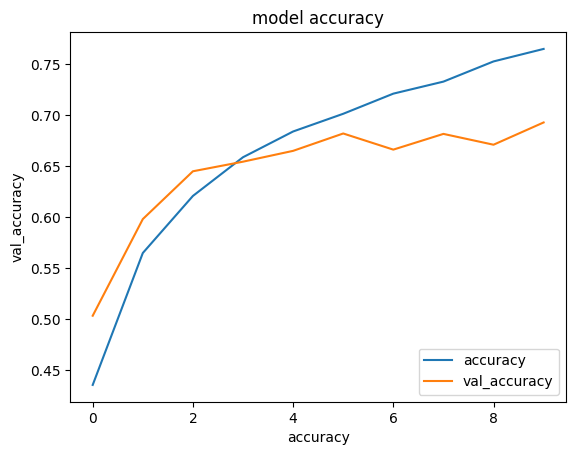

In [7]:
#model_accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['accuracy','val_accuracy'],loc='lower right')
plt.show()

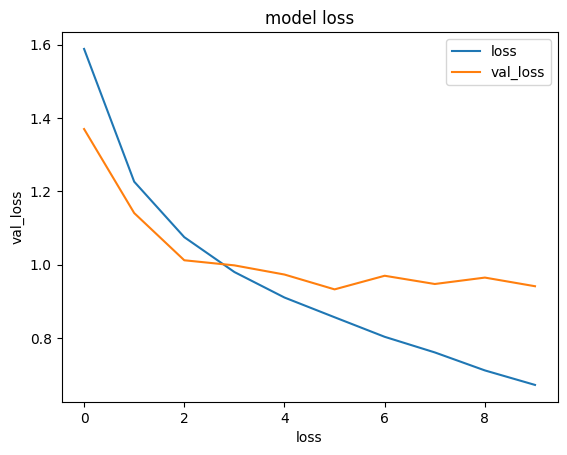

In [8]:
#model_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

In [9]:
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[7.42595457e-03, 8.82576496e-05, 1.45284375e-02, ...,
        1.57171964e-09, 9.25380328e-11, 2.09621195e-10],
       [6.41018432e-03, 1.35631803e-02, 1.51327441e-07, ...,
        8.14074895e-17, 3.25122306e-18, 1.18725740e-18],
       [6.58939064e-01, 4.32419404e-02, 2.63201608e-03, ...,
        7.03805847e-10, 5.51274137e-10, 5.23577015e-10],
       ...,
       [2.06716257e-04, 4.20972384e-07, 1.99215934e-02, ...,
        2.16618130e-12, 3.98143263e-14, 2.57334464e-13],
       [4.70960975e-01, 5.83838066e-03, 1.44637248e-03, ...,
        1.83078392e-13, 1.00156066e-15, 5.61854911e-15],
       [2.03814270e-05, 3.25488691e-05, 8.30070232e-04, ...,
        2.08711130e-12, 7.35007811e-16, 1.00152617e-14]], dtype=float32)

In [10]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([3, 8, 0, ..., 5, 0, 7])

In [11]:
#accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6741